In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

In [143]:
#pip install lifelines
#from lifelines import KaplanMeierFitter

1.Kaplan Meier
2.Cox Regression
3.

In [144]:
#transplant info dataset
tx_ki = pd.read_sas('/home/kidneyData/DATA_SP_2020/tx_ki.sas7bdat')

In [145]:
#TFL_GRAFT_DT Graft Failure date
#REC_FAIL_DT Date of Graft Failure
#PERS_RELIST Re-list date after current tx
# REC_RESUM_MAINT_DIAL 
# PERS_RETX ReTx date after current tx

#PERS_SSA_DEATH_DT- Death date determined from SSA database
#PERS_OPTN_DEATH_DT - OPTN Death date by unique person
#PERS_RESTRICT_DEATH_DT -Restricted death date
#TFL_DEATH_DT -Date Patient died

In [146]:
tx_ki.columns

Index(['ORG_TY', 'PERS_ID', 'REC_TX_DT', 'REC_POSTX_LOS', 'PX_ID',
       'REC_A_MM_EQUIV_TX', 'REC_A_MM_EQUIV_CUR', 'REC_B_MM_EQUIV_TX',
       'REC_B_MM_EQUIV_CUR', 'REC_DR_MM_EQUIV_TX',
       ...
       'TFL_COD', 'PERS_RELIST', 'PERS_RETX', 'PERS_RETX_TRR_ID',
       'TFL_LAFUDATE', 'REC_MM_EQUIV_TX', 'REC_MM_EQUIV_CUR', 'PERS_OPTN_COD',
       'DONOR_ID', 'DONOR_ID_VESSEL'],
      dtype='object', length=285)

In [147]:
tx_ki = tx_ki[[
 'PERS_ID',
 'CAN_GENDER',
 'REC_AGE_AT_TX',
 'TFL_GRAFT_DT',
 'REC_FAIL_DT',
 'PERS_RELIST',
 'PERS_RETX',
 'REC_RESUM_MAINT_DIAL_DT',
 'PERS_SSA_DEATH_DT',
 'PERS_OPTN_DEATH_DT',
 'PERS_RESTRICT_DEATH_DT',
 'TFL_DEATH_DT',
 'TFL_LAFUDATE',
 'TFL_ENDTXFU',
 'REC_TX_DT']]

In [150]:
tx_ki.head(10)

,PERS_ID,CAN_GENDER,REC_AGE_AT_TX,TFL_GRAFT_DT,REC_FAIL_DT,PERS_RELIST,PERS_RETX,REC_RESUM_MAINT_DIAL_DT,PERS_SSA_DEATH_DT,PERS_OPTN_DEATH_DT,PERS_RESTRICT_DEATH_DT,TFL_DEATH_DT,TFL_LAFUDATE,TFL_ENDTXFU,REC_TX_DT
0,4956632.0,b'M',30.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-04-12,2018-11-21,2012-11-20
1,4787788.0,b'M',26.0,NaT,NaT,2013-08-21,NaT,NaT,NaT,NaT,NaT,NaT,2017-10-24,2018-10-20,2012-10-19
2,4059261.0,b'M',42.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-02-09,2018-10-01,2012-09-30
3,4893631.0,b'F',62.0,2012-12-30,2012-12-30,2013-01-02,2018-02-07,2012-12-30,NaT,NaT,NaT,NaT,2013-01-08,2018-12-31,2012-12-30
4,4573989.0,b'M',68.0,2014-10-27,NaT,NaT,NaT,NaT,NaT,2017-09-05,NaT,NaT,2015-01-19,2018-10-06,2012-10-05
5,4791226.0,b'M',42.0,2012-08-18,2012-08-18,2012-08-31,2018-03-12,2012-08-18,NaT,NaT,NaT,NaT,2012-08-22,2019-08-18,2012-08-17
6,4786909.0,b'M',58.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-10-23,2018-10-29,2012-10-28
7,4444927.0,b'M',49.0,NaT,NaT,NaT,NaT,NaT,NaT,2015-04-09,NaT,NaT,2016-07-27,2019-07-28,2012-07-27
8,4926863.0,b'M',56.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-07-18,2018-11-19,2012-11-18
9,4969248.0,b'F',62.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-24,2018-09-13,2012-09-12


In [151]:
tx_ki.shape

(469711, 15)

### Patient Survived - PS

In [15]:
#Patient Survived = 0, Patient Died = 1 

In [152]:
#PS = “Died”, if there is a record in any of the following variables 
pd.options.mode.chained_assignment = None
tx_ki['PS_PS'] = np.where((np.isnat(tx_ki.PERS_SSA_DEATH_DT)), '0', '1')
tx_ki['PS_PO'] = np.where((np.isnat(tx_ki.PERS_OPTN_DEATH_DT)), '0', '1')
tx_ki['PS_PR'] = np.where((np.isnat(tx_ki.PERS_RESTRICT_DEATH_DT)), '0', '1')
tx_ki['PS_PD'] = np.where((np.isnat(tx_ki.TFL_DEATH_DT)), '0', '1')

#PS column 
tx_ki['PS'] = tx_ki[['PS_PS', 'PS_PO', 'PS_PR', 'PS_PD']].max(axis=1)

In [153]:
tx_ki = tx_ki[[
 'PERS_ID',
 'CAN_GENDER',
 'REC_AGE_AT_TX',
 'TFL_GRAFT_DT',
 'REC_FAIL_DT',
 'PERS_RELIST',
 'PERS_RETX',
 'REC_RESUM_MAINT_DIAL_DT',
 'PERS_SSA_DEATH_DT',
 'PERS_OPTN_DEATH_DT',
 'PERS_RESTRICT_DEATH_DT',
 'TFL_DEATH_DT',
 'TFL_LAFUDATE',
 'TFL_ENDTXFU',
 'REC_TX_DT',
 'PS']]

In [154]:
tx_ki.head(20)

,PERS_ID,CAN_GENDER,REC_AGE_AT_TX,TFL_GRAFT_DT,REC_FAIL_DT,PERS_RELIST,PERS_RETX,REC_RESUM_MAINT_DIAL_DT,PERS_SSA_DEATH_DT,PERS_OPTN_DEATH_DT,PERS_RESTRICT_DEATH_DT,TFL_DEATH_DT,TFL_LAFUDATE,TFL_ENDTXFU,REC_TX_DT,PS
0,4956632.0,b'M',30.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-04-12,2018-11-21,2012-11-20,0.0
1,4787788.0,b'M',26.0,NaT,NaT,2013-08-21,NaT,NaT,NaT,NaT,NaT,NaT,2017-10-24,2018-10-20,2012-10-19,0.0
2,4059261.0,b'M',42.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-02-09,2018-10-01,2012-09-30,0.0
3,4893631.0,b'F',62.0,2012-12-30,2012-12-30,2013-01-02,2018-02-07,2012-12-30,NaT,NaT,NaT,NaT,2013-01-08,2018-12-31,2012-12-30,0.0
4,4573989.0,b'M',68.0,2014-10-27,NaT,NaT,NaT,NaT,NaT,2017-09-05,NaT,NaT,2015-01-19,2018-10-06,2012-10-05,1.0
5,4791226.0,b'M',42.0,2012-08-18,2012-08-18,2012-08-31,2018-03-12,2012-08-18,NaT,NaT,NaT,NaT,2012-08-22,2019-08-18,2012-08-17,0.0
6,4786909.0,b'M',58.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-10-23,2018-10-29,2012-10-28,0.0
7,4444927.0,b'M',49.0,NaT,NaT,NaT,NaT,NaT,NaT,2015-04-09,NaT,NaT,2016-07-27,2019-07-28,2012-07-27,1.0
8,4926863.0,b'M',56.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-07-18,2018-11-19,2012-11-18,0.0
9,4969248.0,b'F',62.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-24,2018-09-13,2012-09-12,0.0


### Graft Loss due to kidney failure - KGL

In [37]:
# No Graft Failure = 0, Graft Failure = 1

In [155]:
#KGL = “Failed”, if there is a record in any of the following variables 
pd.options.mode.chained_assignment = None 
tx_ki['KGL_G'] = np.where((np.isnat(tx_ki.TFL_GRAFT_DT)), '0', '1')
tx_ki['KGL_F'] = np.where((np.isnat(tx_ki.REC_FAIL_DT)), '0', '1')
tx_ki['KGL_P'] = np.where((np.isnat(tx_ki.PERS_RELIST)), '0', '1')
tx_ki['KGL_RR'] = np.where((np.isnat(tx_ki.REC_RESUM_MAINT_DIAL_DT)), '0', '1')
tx_ki['KGL_RF'] = np.where((np.isnat(tx_ki.REC_FAIL_DT)), '0', '1')

#KGL column
tx_ki['KGL'] = tx_ki[['KGL_G', 'KGL_F', 'KGL_P', 'KGL_RR', 'KGL_RF']].max(axis=1)

In [156]:
tx_ki = tx_ki[[
 'PERS_ID',
 'CAN_GENDER',
 'REC_AGE_AT_TX',
 'TFL_GRAFT_DT',
 'REC_FAIL_DT',
 'PERS_RELIST',
 'PERS_RETX',
 'REC_RESUM_MAINT_DIAL_DT',
 'PERS_SSA_DEATH_DT',
 'PERS_OPTN_DEATH_DT',
 'PERS_RESTRICT_DEATH_DT',
 'TFL_DEATH_DT',
 'TFL_LAFUDATE',
 'TFL_ENDTXFU',
 'REC_TX_DT',
 'PS',
 'KGL']]

In [157]:
tx_ki.head(20)

,PERS_ID,CAN_GENDER,REC_AGE_AT_TX,TFL_GRAFT_DT,REC_FAIL_DT,PERS_RELIST,PERS_RETX,REC_RESUM_MAINT_DIAL_DT,PERS_SSA_DEATH_DT,PERS_OPTN_DEATH_DT,PERS_RESTRICT_DEATH_DT,TFL_DEATH_DT,TFL_LAFUDATE,TFL_ENDTXFU,REC_TX_DT,PS,KGL
0,4956632.0,b'M',30.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-04-12,2018-11-21,2012-11-20,0.0,0.0
1,4787788.0,b'M',26.0,NaT,NaT,2013-08-21,NaT,NaT,NaT,NaT,NaT,NaT,2017-10-24,2018-10-20,2012-10-19,0.0,1.0
2,4059261.0,b'M',42.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-02-09,2018-10-01,2012-09-30,0.0,0.0
3,4893631.0,b'F',62.0,2012-12-30,2012-12-30,2013-01-02,2018-02-07,2012-12-30,NaT,NaT,NaT,NaT,2013-01-08,2018-12-31,2012-12-30,0.0,1.0
4,4573989.0,b'M',68.0,2014-10-27,NaT,NaT,NaT,NaT,NaT,2017-09-05,NaT,NaT,2015-01-19,2018-10-06,2012-10-05,1.0,1.0
5,4791226.0,b'M',42.0,2012-08-18,2012-08-18,2012-08-31,2018-03-12,2012-08-18,NaT,NaT,NaT,NaT,2012-08-22,2019-08-18,2012-08-17,0.0,1.0
6,4786909.0,b'M',58.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-10-23,2018-10-29,2012-10-28,0.0,0.0
7,4444927.0,b'M',49.0,NaT,NaT,NaT,NaT,NaT,NaT,2015-04-09,NaT,NaT,2016-07-27,2019-07-28,2012-07-27,1.0,0.0
8,4926863.0,b'M',56.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-07-18,2018-11-19,2012-11-18,0.0,0.0
9,4969248.0,b'F',62.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-24,2018-09-13,2012-09-12,0.0,0.0


### Death Censored Graft Loss - DCGL

Graft Loss due to death

In [158]:
#No records of graft failure but patient died
tx_ki['DCGL'] = np.where((tx_ki.PS == 1) & (tx_ki.KGL == 0), 1,0)

In [159]:
tx_ki.head(20)

,PERS_ID,CAN_GENDER,REC_AGE_AT_TX,TFL_GRAFT_DT,REC_FAIL_DT,PERS_RELIST,PERS_RETX,REC_RESUM_MAINT_DIAL_DT,PERS_SSA_DEATH_DT,PERS_OPTN_DEATH_DT,PERS_RESTRICT_DEATH_DT,TFL_DEATH_DT,TFL_LAFUDATE,TFL_ENDTXFU,REC_TX_DT,PS,KGL,DCGL
0,4956632.0,b'M',30.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-04-12,2018-11-21,2012-11-20,0.0,0.0,0
1,4787788.0,b'M',26.0,NaT,NaT,2013-08-21,NaT,NaT,NaT,NaT,NaT,NaT,2017-10-24,2018-10-20,2012-10-19,0.0,1.0,0
2,4059261.0,b'M',42.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-02-09,2018-10-01,2012-09-30,0.0,0.0,0
3,4893631.0,b'F',62.0,2012-12-30,2012-12-30,2013-01-02,2018-02-07,2012-12-30,NaT,NaT,NaT,NaT,2013-01-08,2018-12-31,2012-12-30,0.0,1.0,0
4,4573989.0,b'M',68.0,2014-10-27,NaT,NaT,NaT,NaT,NaT,2017-09-05,NaT,NaT,2015-01-19,2018-10-06,2012-10-05,1.0,1.0,0
5,4791226.0,b'M',42.0,2012-08-18,2012-08-18,2012-08-31,2018-03-12,2012-08-18,NaT,NaT,NaT,NaT,2012-08-22,2019-08-18,2012-08-17,0.0,1.0,0
6,4786909.0,b'M',58.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-10-23,2018-10-29,2012-10-28,0.0,0.0,0
7,4444927.0,b'M',49.0,NaT,NaT,NaT,NaT,NaT,NaT,2015-04-09,NaT,NaT,2016-07-27,2019-07-28,2012-07-27,1.0,0.0,1
8,4926863.0,b'M',56.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-07-18,2018-11-19,2012-11-18,0.0,0.0,0
9,4969248.0,b'F',62.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-24,2018-09-13,2012-09-12,0.0,0.0,0


### Graft Loss - GL

In [120]:
#Takes into consideration all graft losses; both graft failure losses(KGL) and graft losses due to death(DCGL)
# Graft Loss = 1, No Graft loss = 0

In [160]:
tx_ki['GL'] = tx_ki[['KGL', 'DCGL']].max(axis=1)

In [161]:
tx_ki.head(50)

,PERS_ID,CAN_GENDER,REC_AGE_AT_TX,TFL_GRAFT_DT,REC_FAIL_DT,PERS_RELIST,PERS_RETX,REC_RESUM_MAINT_DIAL_DT,PERS_SSA_DEATH_DT,PERS_OPTN_DEATH_DT,PERS_RESTRICT_DEATH_DT,TFL_DEATH_DT,TFL_LAFUDATE,TFL_ENDTXFU,REC_TX_DT,PS,KGL,DCGL,GL
0,4956632.0,b'M',30.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-04-12,2018-11-21,2012-11-20,0.0,0.0,0,0.0
1,4787788.0,b'M',26.0,NaT,NaT,2013-08-21,NaT,NaT,NaT,NaT,NaT,NaT,2017-10-24,2018-10-20,2012-10-19,0.0,1.0,0,1.0
2,4059261.0,b'M',42.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-02-09,2018-10-01,2012-09-30,0.0,0.0,0,0.0
3,4893631.0,b'F',62.0,2012-12-30,2012-12-30,2013-01-02,2018-02-07,2012-12-30,NaT,NaT,NaT,NaT,2013-01-08,2018-12-31,2012-12-30,0.0,1.0,0,1.0
4,4573989.0,b'M',68.0,2014-10-27,NaT,NaT,NaT,NaT,NaT,2017-09-05,NaT,NaT,2015-01-19,2018-10-06,2012-10-05,1.0,1.0,0,1.0
5,4791226.0,b'M',42.0,2012-08-18,2012-08-18,2012-08-31,2018-03-12,2012-08-18,NaT,NaT,NaT,NaT,2012-08-22,2019-08-18,2012-08-17,0.0,1.0,0,1.0
6,4786909.0,b'M',58.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-10-23,2018-10-29,2012-10-28,0.0,0.0,0,0.0
7,4444927.0,b'M',49.0,NaT,NaT,NaT,NaT,NaT,NaT,2015-04-09,NaT,NaT,2016-07-27,2019-07-28,2012-07-27,1.0,0.0,1,1.0
8,4926863.0,b'M',56.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-07-18,2018-11-19,2012-11-18,0.0,0.0,0,0.0
9,4969248.0,b'F',62.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-24,2018-09-13,2012-09-12,0.0,0.0,0,0.0


In [162]:
tx_ki.isna().sum()

PERS_ID                         0
CAN_GENDER                      0
REC_AGE_AT_TX                   1
TFL_GRAFT_DT               357179
REC_FAIL_DT                458651
PERS_RELIST                393625
PERS_RETX                  426686
REC_RESUM_MAINT_DIAL_DT    460507
PERS_SSA_DEATH_DT          346937
PERS_OPTN_DEATH_DT         331650
PERS_RESTRICT_DEATH_DT     457316
TFL_DEATH_DT               367144
TFL_LAFUDATE                    0
TFL_ENDTXFU                     0
REC_TX_DT                       0
PS                              0
KGL                             0
DCGL                            0
GL                              0
dtype: int64

### Number of days Until Event Occured - DAYS 

If the PS (Patient Survival) Survived, the value will be DAYS = TFL_LAFUDATE - REC_TX_DT. 
Otherwise DAYS = min(TFL_LAFUDATE, TFL_ENDTXFU) – REC_TX_DT.

In [163]:
#minimum date of TFL_LAFUDATE, TFL_ENDTXFU
tx_ki['TFL_LAF_END_MIN'] = tx_ki[['TFL_LAFUDATE', 'TFL_ENDTXFU']].min(axis=1)

In [164]:
tx_ki['DAYS'] = np.where(tx_ki.PS == 0, tx_ki.TFL_LAFUDATE - tx_ki.REC_TX_DT, tx_ki.TFL_LAF_END_MIN - tx_ki.REC_TX_DT)
tx_ki['DAYS']=(tx_ki['DAYS']).dt.days

In [165]:
tx_ki.head(20)

,PERS_ID,CAN_GENDER,REC_AGE_AT_TX,TFL_GRAFT_DT,REC_FAIL_DT,PERS_RELIST,PERS_RETX,REC_RESUM_MAINT_DIAL_DT,PERS_SSA_DEATH_DT,PERS_OPTN_DEATH_DT,...,TFL_DEATH_DT,TFL_LAFUDATE,TFL_ENDTXFU,REC_TX_DT,PS,KGL,DCGL,GL,TFL_LAF_END_MIN,DAYS
0,4956632.0,b'M',30.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,2018-04-12,2018-11-21,2012-11-20,0.0,0.0,0,0.0,2018-04-12,1969
1,4787788.0,b'M',26.0,NaT,NaT,2013-08-21,NaT,NaT,NaT,NaT,...,NaT,2017-10-24,2018-10-20,2012-10-19,0.0,1.0,0,1.0,2017-10-24,1831
2,4059261.0,b'M',42.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,2017-02-09,2018-10-01,2012-09-30,0.0,0.0,0,0.0,2017-02-09,1593
3,4893631.0,b'F',62.0,2012-12-30,2012-12-30,2013-01-02,2018-02-07,2012-12-30,NaT,NaT,...,NaT,2013-01-08,2018-12-31,2012-12-30,0.0,1.0,0,1.0,2013-01-08,9
4,4573989.0,b'M',68.0,2014-10-27,NaT,NaT,NaT,NaT,NaT,2017-09-05,...,NaT,2015-01-19,2018-10-06,2012-10-05,1.0,1.0,0,1.0,2015-01-19,836
5,4791226.0,b'M',42.0,2012-08-18,2012-08-18,2012-08-31,2018-03-12,2012-08-18,NaT,NaT,...,NaT,2012-08-22,2019-08-18,2012-08-17,0.0,1.0,0,1.0,2012-08-22,5
6,4786909.0,b'M',58.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,2018-10-23,2018-10-29,2012-10-28,0.0,0.0,0,0.0,2018-10-23,2186
7,4444927.0,b'M',49.0,NaT,NaT,NaT,NaT,NaT,NaT,2015-04-09,...,NaT,2016-07-27,2019-07-28,2012-07-27,1.0,0.0,1,1.0,2016-07-27,1461
8,4926863.0,b'M',56.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,2018-07-18,2018-11-19,2012-11-18,0.0,0.0,0,0.0,2018-07-18,2068
9,4969248.0,b'F',62.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,2019-05-24,2018-09-13,2012-09-12,0.0,0.0,0,0.0,2018-09-13,2445


In [166]:
tx_ki = tx_ki[[
 'PERS_ID',
 'CAN_GENDER',
 'REC_AGE_AT_TX',
 'TFL_GRAFT_DT',
 'REC_FAIL_DT',
 'PERS_RELIST',
 'PERS_RETX',
 'REC_RESUM_MAINT_DIAL_DT',
 'PERS_SSA_DEATH_DT',
 'PERS_OPTN_DEATH_DT',
 'PERS_RESTRICT_DEATH_DT',
 'TFL_DEATH_DT',
 'TFL_LAFUDATE',
 'TFL_ENDTXFU',
 'REC_TX_DT',
 'PS',
 'KGL',
 'DCGL',
 'GL',
 'DAYS']]

In [167]:
tx_ki.head(50)

,PERS_ID,CAN_GENDER,REC_AGE_AT_TX,TFL_GRAFT_DT,REC_FAIL_DT,PERS_RELIST,PERS_RETX,REC_RESUM_MAINT_DIAL_DT,PERS_SSA_DEATH_DT,PERS_OPTN_DEATH_DT,PERS_RESTRICT_DEATH_DT,TFL_DEATH_DT,TFL_LAFUDATE,TFL_ENDTXFU,REC_TX_DT,PS,KGL,DCGL,GL,DAYS
0,4956632.0,b'M',30.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-04-12,2018-11-21,2012-11-20,0.0,0.0,0,0.0,1969
1,4787788.0,b'M',26.0,NaT,NaT,2013-08-21,NaT,NaT,NaT,NaT,NaT,NaT,2017-10-24,2018-10-20,2012-10-19,0.0,1.0,0,1.0,1831
2,4059261.0,b'M',42.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2017-02-09,2018-10-01,2012-09-30,0.0,0.0,0,0.0,1593
3,4893631.0,b'F',62.0,2012-12-30,2012-12-30,2013-01-02,2018-02-07,2012-12-30,NaT,NaT,NaT,NaT,2013-01-08,2018-12-31,2012-12-30,0.0,1.0,0,1.0,9
4,4573989.0,b'M',68.0,2014-10-27,NaT,NaT,NaT,NaT,NaT,2017-09-05,NaT,NaT,2015-01-19,2018-10-06,2012-10-05,1.0,1.0,0,1.0,836
5,4791226.0,b'M',42.0,2012-08-18,2012-08-18,2012-08-31,2018-03-12,2012-08-18,NaT,NaT,NaT,NaT,2012-08-22,2019-08-18,2012-08-17,0.0,1.0,0,1.0,5
6,4786909.0,b'M',58.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-10-23,2018-10-29,2012-10-28,0.0,0.0,0,0.0,2186
7,4444927.0,b'M',49.0,NaT,NaT,NaT,NaT,NaT,NaT,2015-04-09,NaT,NaT,2016-07-27,2019-07-28,2012-07-27,1.0,0.0,1,1.0,1461
8,4926863.0,b'M',56.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-07-18,2018-11-19,2012-11-18,0.0,0.0,0,0.0,2068
9,4969248.0,b'F',62.0,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-24,2018-09-13,2012-09-12,0.0,0.0,0,0.0,2445


In [168]:
tx_ki.isna().sum()

PERS_ID                         0
CAN_GENDER                      0
REC_AGE_AT_TX                   1
TFL_GRAFT_DT               357179
REC_FAIL_DT                458651
PERS_RELIST                393625
PERS_RETX                  426686
REC_RESUM_MAINT_DIAL_DT    460507
PERS_SSA_DEATH_DT          346937
PERS_OPTN_DEATH_DT         331650
PERS_RESTRICT_DEATH_DT     457316
TFL_DEATH_DT               367144
TFL_LAFUDATE                    0
TFL_ENDTXFU                     0
REC_TX_DT                       0
PS                              0
KGL                             0
DCGL                            0
GL                              0
DAYS                            0
dtype: int64

### MERGING WITH DATASET FROM IMMUNOGENICITY AND EPLETS CALCULATIONS

In [271]:
dataset_survival = pd.read_csv('dataset_calc_addsurvthreev.csv', encoding="latin1", low_memory=False)

In [272]:
dataset_survival.shape

(81004, 52)

In [273]:

dataset_survival.head(20)

,Unnamed: 0,DON_RACE,DON_A1,DON_A2,DON_B1,DON_B2,DON_DR1,DON_DR2,PERS_ID,CAN_RACE,...,Avg_AMS,DON_EPLETS,REC_EPLETS,AbvMismatch,OthMismatch,Abv_Desc,Oth_Desc,TFL_GRAFT_DT,REC_TX_DT,TFL_LASTATUS
0,0,White,1.0,11.0,35.0,60.0,1.0,8.0,3759020.0,White,...,4.625,"{'66I', '70D', '80TL', '47Y', '180E', '275EL',...","{'66I', '70D', '80TL', '152E', 'rq75VT', '180V...",19,19,"['180E', '76ANT', '166DG', '71TTS', '163RG', '...","['47Y', '275EL', '86G', '77NGT', '193PI', '152...",NaN,2012-11-20,b'A'
1,2,White,24.0,68.0,60.0,62.0,4.0,13.0,3147238.0,Black or African American,...,11.500,"{'66I', '152E', '47Y', '275EL', 'rq75VT', 'rq1...","{'66I', '152E', '47Y', 'rq75VT', 'rq140TV', '1...",21,19,"['98E', '76ANT', '166DG', '67LQ', '104A', '74R...","['275EL', '77NGT', 'rp67LK', '181T', '71K', '1...",NaN,2012-09-30,b'N'
2,3,White,1.0,2.0,7.0,8.0,17.0,4.0,2599447.0,Black or African American,...,7.875,"{'66I', '70D', '80TL', '152E', '47Y', '180E', ...","{'66I', '80TL', '152E', '275EL', 'rq75VT', '18...",16,19,"['70D', '180E', '156DA', '98E', '71TTS', '104A...","['47Y', 'rp37FV', '184A', '86G', '62RN', '163T...",2012-12-30,2012-12-30,b'A'
3,4,Black or African American,30.0,74.0,8.0,63.0,17.0,7.0,3257192.0,Black or African American,...,6.750,"{'66I', '152E', '47Y', '275EL', 'rq75VT', 'rq1...","{'66I', '152E', '47Y', '275EL', 'rq75VT', 'rq1...",17,11,"['98E', '67LQ', '104A', '144KHA', '47F', '127K...","['12M', '66K', '74A', '184A', '156QA', 'rq74AV...",2014-10-27,2012-10-05,b'A'
4,5,White,2.0,11.0,51.0,55.0,4.0,11.0,2619730.0,White,...,6.125,"{'66I', '152E', '47Y', 'rq75VT', 'rq140TV', '1...","{'66I', 'rq75VT', 'rq140TV', 'rp67LK', '166DG'...",11,19,"['144K', '144KHA', '150AAH', '142TKH', '71TTS'...","['152E', '47Y', 'rq57S', '67I', '30H', 'rqp67I...",2012-08-18,2012-08-17,b'A'
5,7,Black or African American,68.0,68.0,53.0,72.0,12.0,13.0,2663909.0,Black or African American,...,5.375,"{'66I', '152E', '47Y', '275EL', 'rq75VT', 'rq1...","{'66I', '152E', '275EL', 'rq75VT', 'rq140TV', ...",15,13,"['98E', '143S', '67LQ', '104A', '76ESI', '41T'...","['47Y', '245AS', '147L', '177DK', '86V', '156Q...",NaN,2012-07-27,b'N'
6,8,White,1.0,23.0,13.0,38.0,4.0,14.0,2906016.0,Asian,...,7.875,"{'66I', '47Y', 'rq75VT', 'rq140TV', '193AV', '...","{'66I', '152E', '47Y', '275EL', 'rq75VT', 'rq1...",19,11,"['143S', '144KHA', '76ESI', '47F', '127K', '96...","['rq57S', '67I', '96QN', '147L', '177DK', '66K...",NaN,2012-11-18,b'A'
7,11,White,11.0,32.0,51.0,60.0,1.0,4.0,3147315.0,Black or African American,...,9.625,"{'66I', '152E', '47Y', '275EL', 'rq75VT', 'rq1...","{'66I', '152E', '47Y', '275EL', 'rq75VT', '77N...",18,20,"['76ANT', '166DG', '144K', ' ', '74R', '156DA'...","['rq140TV', 'rp67LK', '11AV', '71K', '66K', '1...",NaN,2012-10-31,b'A'
8,12,White,2.0,32.0,50.0,60.0,8.0,15.0,3265224.0,White,...,0.000,set(),"{'70D', 'rq75VT', '180V', '47F', 'rq140TV', '3...",0,0,[],[],NaN,2012-08-12,b'A'
9,13,Black or African American,1.0,2.0,35.0,81.0,17.0,11.0,2870483.0,Black or African American,...,6.125,"{'66I', '152E', '47Y', 'rq75VT', '30C', '193AV...","{'66I', '70D', '80TL', '180E', 'rq75VT', '156D...",17,17,"['30C', '67LQ', '131S', ' ', '69TNT', '13FE', ...","['152E', '47Y', '11AV', '12M', '140A', '31I', ...",2014-05-15,2012-10-11,b'A'


In [173]:
#merge survival dataset with immunogenicity and eplet load calcs
dataset_survival = dataset_survival.merge(tx_ki, left_index=True, right_index=True,
             on='PERS_ID', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

In [174]:
dataset_survival.head(20)

,Unnamed: 0,DON_RACE,DON_A1,DON_A2,DON_B1,DON_B2,DON_DR1,DON_DR2,PERS_ID,CAN_RACE,...,PERS_OPTN_DEATH_DT,PERS_RESTRICT_DEATH_DT,TFL_DEATH_DT,TFL_LAFUDATE,TFL_ENDTXFU,PS,KGL,DCGL,GL,DAYS
0,0,White,1.0,11.0,35.0,60.0,1.0,8.0,3759020.0,White,...,NaT,NaT,NaT,2018-04-12,2018-11-21,0.0,0.0,0,0.0,1969
1,2,White,24.0,68.0,60.0,62.0,4.0,13.0,3147238.0,Black or African American,...,NaT,NaT,NaT,2017-10-24,2018-10-20,0.0,1.0,0,1.0,1831
2,3,White,1.0,2.0,7.0,8.0,17.0,4.0,2599447.0,Black or African American,...,NaT,NaT,NaT,2017-02-09,2018-10-01,0.0,0.0,0,0.0,1593
3,4,Black or African American,30.0,74.0,8.0,63.0,17.0,7.0,3257192.0,Black or African American,...,NaT,NaT,NaT,2013-01-08,2018-12-31,0.0,1.0,0,1.0,9
4,5,White,2.0,11.0,51.0,55.0,4.0,11.0,2619730.0,White,...,2017-09-05,NaT,NaT,2015-01-19,2018-10-06,1.0,1.0,0,1.0,836
5,7,Black or African American,68.0,68.0,53.0,72.0,12.0,13.0,2663909.0,Black or African American,...,NaT,NaT,NaT,2012-08-22,2019-08-18,0.0,1.0,0,1.0,5
6,8,White,1.0,23.0,13.0,38.0,4.0,14.0,2906016.0,Asian,...,NaT,NaT,NaT,2018-10-23,2018-10-29,0.0,0.0,0,0.0,2186
7,11,White,11.0,32.0,51.0,60.0,1.0,4.0,3147315.0,Black or African American,...,2015-04-09,NaT,NaT,2016-07-27,2019-07-28,1.0,0.0,1,1.0,1461
8,12,White,2.0,32.0,50.0,60.0,8.0,15.0,3265224.0,White,...,NaT,NaT,NaT,2018-07-18,2018-11-19,0.0,0.0,0,0.0,2068
9,13,Black or African American,1.0,2.0,35.0,81.0,17.0,11.0,2870483.0,Black or African American,...,NaT,NaT,NaT,2019-05-24,2018-09-13,0.0,0.0,0,0.0,2445


In [175]:
dataset_survival.drop(columns=dataset_survival.columns[0], axis=1, inplace=True)
dataset_survival.head(20)

In [177]:
dataset_survival.isna().sum()

DON_RACE    0
DON_A1      0
DON_A2      0
DON_B1      0
DON_B2      0
           ..
PS          0
KGL         0
DCGL        0
GL          0
DAYS        0
Length: 68, dtype: int64

In [178]:
#save data
dataset_survival.to_csv("dataset_survival.csv")

### KAPLAN MEIER ANALYSIS

In [63]:
from lifelines import KaplanMeierFitter

In [64]:
#loading data
dataset_survival = pd.read_csv('dataset_survival.csv', encoding="latin1", low_memory=False)
dataset_survival.drop(columns=dataset_survival.columns[0], axis=1, inplace=True)

In [65]:
dataset_survival.head(10)

,DON_RACE,DON_A1,DON_A2,DON_B1,DON_B2,DON_DR1,DON_DR2,PERS_ID,CAN_RACE,REC_A1,...,PERS_OPTN_DEATH_DT,PERS_RESTRICT_DEATH_DT,TFL_DEATH_DT,TFL_LAFUDATE,TFL_ENDTXFU,PS,KGL,DCGL,GL,DAYS
0,White,1.0,11.0,35.0,60.0,1.0,8.0,3759020.0,White,11.0,...,NaN,NaN,NaN,2018-04-12,2018-11-21,0.0,0.0,0,0.0,1969
1,White,24.0,68.0,60.0,62.0,4.0,13.0,3147238.0,Black or African American,31.0,...,NaN,NaN,NaN,2017-10-24,2018-10-20,0.0,1.0,0,1.0,1831
2,White,1.0,2.0,7.0,8.0,17.0,4.0,2599447.0,Black or African American,203.0,...,NaN,NaN,NaN,2017-02-09,2018-10-01,0.0,0.0,0,0.0,1593
3,Black or African American,30.0,74.0,8.0,63.0,17.0,7.0,3257192.0,Black or African American,1.0,...,NaN,NaN,NaN,2013-01-08,2018-12-31,0.0,1.0,0,1.0,9
4,White,2.0,11.0,51.0,55.0,4.0,11.0,2619730.0,White,3.0,...,2017-09-05,NaN,NaN,2015-01-19,2018-10-06,1.0,1.0,0,1.0,836
5,Black or African American,68.0,68.0,53.0,72.0,12.0,13.0,2663909.0,Black or African American,23.0,...,NaN,NaN,NaN,2012-08-22,2019-08-18,0.0,1.0,0,1.0,5
6,White,1.0,23.0,13.0,38.0,4.0,14.0,2906016.0,Asian,2.0,...,NaN,NaN,NaN,2018-10-23,2018-10-29,0.0,0.0,0,0.0,2186
7,White,11.0,32.0,51.0,60.0,1.0,4.0,3147315.0,Black or African American,2.0,...,2015-04-09,NaN,NaN,2016-07-27,2019-07-28,1.0,0.0,1,1.0,1461
8,White,2.0,32.0,50.0,60.0,8.0,15.0,3265224.0,White,3.0,...,NaN,NaN,NaN,2018-07-18,2018-11-19,0.0,0.0,0,0.0,2068
9,Black or African American,1.0,2.0,35.0,81.0,17.0,11.0,2870483.0,Black or African American,23.0,...,NaN,NaN,NaN,2019-05-24,2018-09-13,0.0,0.0,0,0.0,2445


In [70]:
dataset_survival.columns

Index(['DON_RACE', 'DON_A1', 'DON_A2', 'DON_B1', 'DON_B2', 'DON_DR1',
       'DON_DR2', 'PERS_ID', 'CAN_RACE', 'REC_A1', 'REC_A2', 'REC_B1',
       'REC_B2', 'REC_DR1', 'REC_DR2', 'DON_A1_HR', 'DON_A2_HR', 'DON_B1_HR',
       'DON_B2_HR', 'DON_DR1_HR', 'DON_DR2_HR', 'REC_A1_HR', 'REC_A2_HR',
       'REC_B1_HR', 'REC_B2_HR', 'REC_DR1_HR', 'REC_DR2_HR', 'AB_HMS',
       'AB_EMS', 'AB_AMS', 'DR_HMS', 'DR_EMS', 'DR_AMS', 'DR_alphaHMS',
       'DR_alphaEMS', 'DR_alphaAMS', 'DR_betaHMS', 'DR_betaEMS', 'DR_betaAMS',
       'Avg_EMS', 'Avg_HMS', 'Avg_AMS', 'DON_EPLETS', 'REC_EPLETS',
       'AbvMismatch', 'OthMismatch', 'Abv_Desc', 'Oth_Desc', 'TFL_GRAFT_DT',
       'REC_TX_DT', 'TFL_LASTATUS', 'CAN_GENDER', 'REC_AGE_AT_TX',
       'REC_FAIL_DT', 'PERS_RELIST', 'PERS_RETX', 'REC_RESUM_MAINT_DIAL_DT',
       'PERS_SSA_DEATH_DT', 'PERS_OPTN_DEATH_DT', 'PERS_RESTRICT_DEATH_DT',
       'TFL_DEATH_DT', 'TFL_LAFUDATE', 'TFL_ENDTXFU', 'PS', 'KGL', 'DCGL',
       'GL', 'DAYS'],
      dtype='object')

#### Kaplan Curve  showing Overall Kidney Graft Allocation Survival

In [71]:
## create a kmf object
kmf = KaplanMeierFitter()

T=dataset_survival['DAYS'] #duration
C=dataset_survival['GL'] # 0 = No Graft Loss, Graft Loss=1

kmf.fit(T, C,label='Kaplan Meier Estimate') 

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 81004 total observations, 56025 right-censored observations>

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Kaplan-Meier survival curve of overall survival (in days) among kidney transplant patients (2000-2010)')

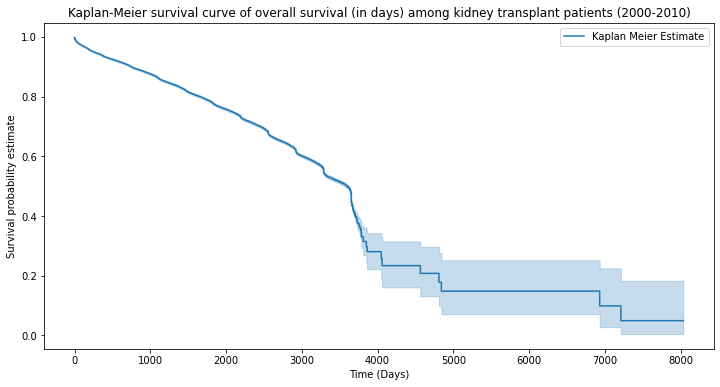

In [72]:
#KPM curve of  Overall Kidney Graft Allocation with Confidence Interval
%pylab inline
figsize(12,6)
kmf.plot()
plt.xlabel('Time (Days)')
plt.ylabel('Survival probability estimate')
plt.title('Kaplan-Meier survival curve of overall survival (in days) among kidney transplant patients (2000-2010)')

Text(0.5, 1.0, 'Kaplan Meier Curve of Kidney Graft Survival')

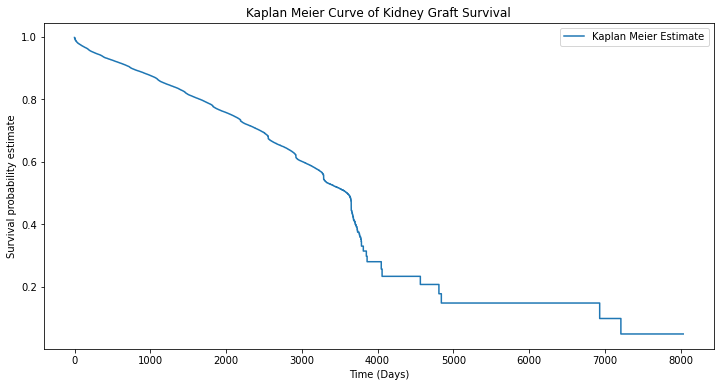

In [73]:
#KPM curve of  Overall Kidney Graft Allocation without Confidence Interval
kmf.plot(ci_show=False) 
plt.xlabel('Time (Days)')
plt.ylabel('Survival probability estimate')
plt.title('Kaplan Meier Curve of Kidney Graft Survival')

In [74]:
# median survival time
print("The median survival time :",kmf.median_survival_time_)

The median survival time : 3598.0


The KPM Curve shows the kidney graft survival curve of kidney receipients over 8000 days (about 22 years).
The Y axis reepresnts the probability of surviving past x Days
From the KPM Curve, the survival rate decreases with the increase in the number of days.
The overall average survival time (Graft half-lives or median survival) of patients is 3598 days(10 years) after kidney graft allocation
The KPM estimate is approximately 1 for the initial days after the transplant. It gradually decreases to around 0.5
by 3500 days after which there is sharp drop indicating a great churn off after that time
The probability of a receipient surving past 5000  days(13.70 years) is less than 20% 
It is observed that less than 20% of patients survived past 5000 days  with even fewer making it past 7000 days
Patient survival was about 90% after 1000 days, about 50% after 3500 days and less than 20% after 5000 days. 

In [75]:
#the survival probabilities at time 1000, 2000, 3000, 3500, 4000, 5000, 6000, 7000 days etc
survivals = pd.DataFrame([1000, 2000, 3000, 3500, 3598, 4000, 5000, 6000, 7000], columns = ['time'])
survivals.loc[:, 'Survival Prob'] = kmf.survival_function_at_times(survivals['time']).values
survivals

,time,Survival Prob
0,1000,0.875979
1,2000,0.757479
2,3000,0.601265
3,3500,0.514583
4,3598,0.499913
5,4000,0.280516
6,5000,0.148421
7,6000,0.148421
8,7000,0.098947


In [76]:
#confidence interval
kmf.confidence_interval_survival_function_

,Kaplan Meier Estimate_lower_0.95,Kaplan Meier Estimate_upper_0.95
0.0,0.997099,0.997793
1.0,0.996439,0.997213
2.0,0.995967,0.996793
3.0,0.995298,0.996194
4.0,0.994368,0.995355
...,...,...
6058.0,0.071359,0.251952
6851.0,0.071359,0.251952
6932.0,0.027796,0.224603
7212.0,0.004891,0.182919


In [77]:
#cumulative density of survival
#shows probability of a graft loss at a certain time.
kmf.cumulative_density_
#ie at day Day 1, there is 0.003150 (0.315%) probability of graft loss

,Kaplan Meier Estimate
timeline,
0.0,0.002531
1.0,0.003150
2.0,0.003596
3.0,0.004230
4.0,0.005115
...,...
6058.0,0.851579
6851.0,0.851579
6932.0,0.901053


#### SUBGROUP ANALYSIS

#### GENDER

In [78]:
dataset_survival['CAN_GENDER'].unique()

array(["b'M'", "b'F'"], dtype=object)

In [79]:
dataset_survival.CAN_GENDER.value_counts()

b'M'    49145
b'F'    31859
Name: CAN_GENDER, dtype: int64

In [80]:
male=(49145/(49145+31859))*100
female=(31859/(49145+31859))*100
print("The male percentage is :",male)
print("The female percentage is :",female)

The male percentage is : 60.66984346452027
The female percentage is : 39.33015653547972


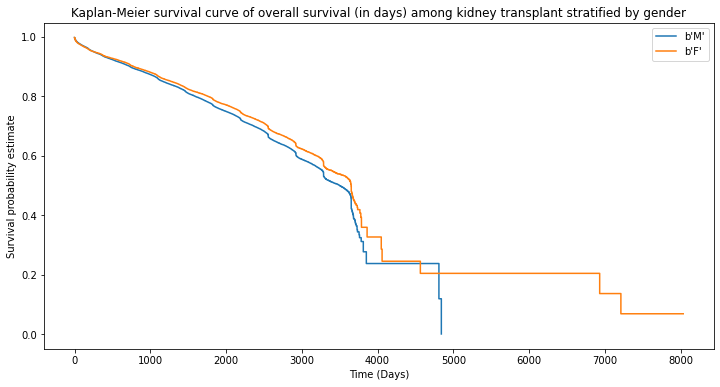

In [81]:
ax = subplot(111)

for r in dataset_survival['CAN_GENDER'].unique(): 
    ix = dataset_survival['CAN_GENDER'] == r
    kmf.fit(T[ix], C[ix], label = r)
    ax=kmf.plot(ax=ax, ci_show=False)
    plt.xlabel('Time (Days)')
    plt.ylabel('Survival probability estimate')
    plt.title('Kaplan-Meier survival curve of overall survival (in days) among kidney transplant stratified by gender')

Cases were distributed by gender  approximately as: 61% male, 39% female.
the above plot suggests that females tend to have a slightly higher probability of survival compared to males
The survival probility of males steeply drops before 5000 days indicating a great churn off after that time
The probability of a female receipient surving past 7000  days is less than 20%

The difference in the Kaplan-Meier survival probabilities among the females and males was statistically significant (p-value < 0.05 as seen in the log rank test below).

In [82]:
# Checking if the diffrence between survival of the two groups is statistically significant
#Log-Rank Test (test statistical difference between the two survival curves)
S1 = dataset_survival[dataset_survival.CAN_GENDER ==  "b'M'"]

S2 = dataset_survival[dataset_survival.CAN_GENDER ==  "b'F'"]

from lifelines.statistics import logrank_test
def logrank_p_value(group_1_data, group_2_data):
    result = logrank_test(group_1_data.DAYS, group_2_data.DAYS,
                          group_1_data.GL, group_2_data.GL)
    return result.p_value

logrank_p_value(S1, S2)

1.5268476307766219e-16

#### RACE

In [83]:
dataset_survival['CAN_RACE'].unique()

array(['White', 'Black or African American', 'Asian', 'Hispanic/Latino',
       'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [84]:
dataset_survival.CAN_RACE.value_counts()

White                                        44612
Black or African American                    23267
Hispanic/Latino                               8341
Asian                                         3498
American Indian or Alaska Native               834
Native Hawaiian or Other Pacific Islander      452
Name: CAN_RACE, dtype: int64

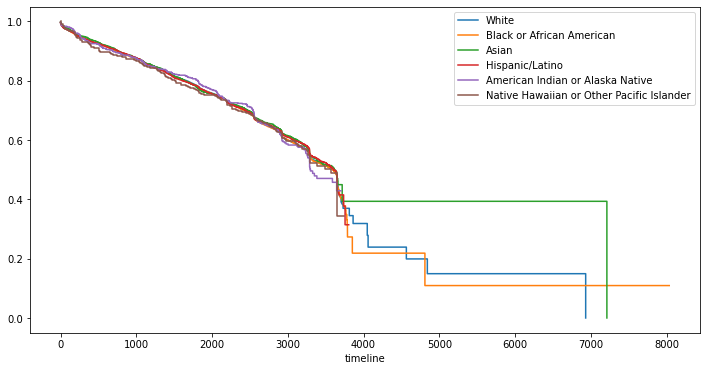

In [85]:
ax = subplot(111)

for r in dataset_survival['CAN_RACE'].unique(): 
    ix = dataset_survival['CAN_RACE'] == r
    kmf.fit(T[ix], C[ix], label = r)
    ax=kmf.plot(ax=ax, ci_show=False)

Cases of KGA were distributed approximately as follows: 55% white, 29% black American, 10% Asian etc.
The above plot suggests that whites, Black or African American and Asian have the highest probability survival curve compared to the other three races of Hispanic/Latino, American Indian or Alaska Native, Native Hawaiian or Other Pacific Islander 
From the curve, the three races of Hispanic/Latino, American Indian or Alaska Native, Native Hawaiian or Other 
Pacific Islander completeley drop off before 4000 days in contrast to the first three
Hence the division of plots into first three and last three as seen below

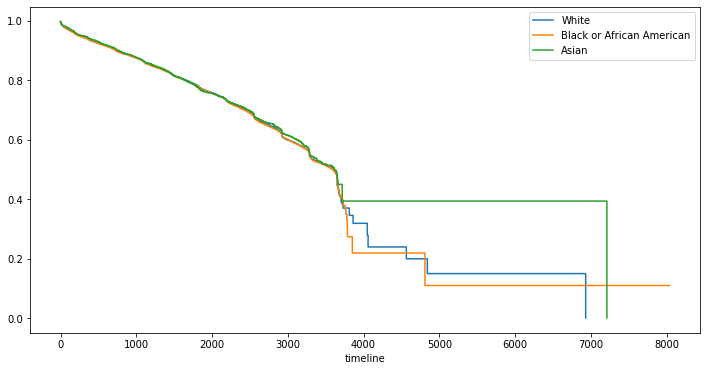

In [86]:
#subdivision of kpm plot by whites, Black or African American and Asian 
ax = subplot(111)

for r in dataset_survival['CAN_RACE'].unique()[:3]: 
    ix = dataset_survival['CAN_RACE'] == r
    kmf.fit(T[ix], C[ix], label = r)
    ax=kmf.plot(ax=ax, ci_show=False)

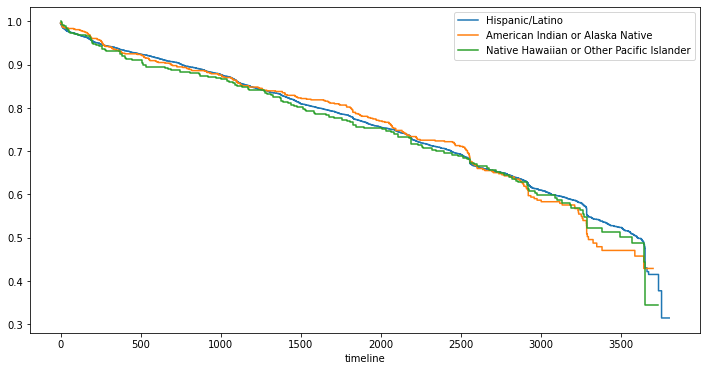

In [87]:
#subdivision kpm plot by hispanic/Latino, American Indian or Alaska Native, Native Hawaiian or Other Pacific Islander 
ax = subplot(111)

for r in dataset_survival['CAN_RACE'].unique()[3:]: 
    ix = dataset_survival['CAN_RACE'] == r
    kmf.fit(T[ix], C[ix], label = r)
    ax=kmf.plot(ax=ax, ci_show=False)

whites, Black or African American and Asians have a similar survival curve before 3500 days. Beyond that point, 
Asians had a higher survival curve followed by Whites then Black or African Americans. The survival curve plot
above also suggests that Asians tend to have a slightly higher probability of survival followed by whites and blacks respectively
The probability of an Asian  surving past 5000  days is about 35%
The probability of a White and Black Amertican surving past 5000  days is less than 20% with slightly better
survival probabilty of whites compared to blacks

The survival curves of Hispanic/Latino, American Indian or Alaska Native, Native Hawaiian or Other 
Pacific Islande are similar

#### AGE

(array([1.3180e+03, 3.0070e+03, 4.5750e+03, 9.1900e+03, 1.3129e+04,
        2.0006e+04, 2.0872e+04, 8.1320e+03, 7.6800e+02, 7.0000e+00]),
 array([ 0. ,  9.6, 19.2, 28.8, 38.4, 48. , 57.6, 67.2, 76.8, 86.4, 96. ]),
 <BarContainer object of 10 artists>)

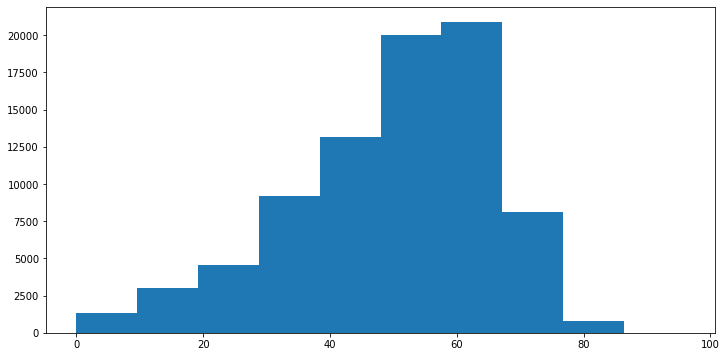

In [88]:
plt.hist(dataset_survival['REC_AGE_AT_TX'])

In [89]:
#fxn to create age group
def age_group(age):
    if age <= 40:  
        return "< 40"
    elif age <= 60: 
        return "41 - 60"
    else:           
        return "> 60"

In [90]:
# Apply age_group function to REC_AGE_AT_TX column
dataset_survival['REC_AGE_AT_TX'] = dataset_survival['REC_AGE_AT_TX'].apply(age_group)

In [91]:
#age categories count
dataset_survival.REC_AGE_AT_TX.value_counts()

41 - 60    37369
> 60       22979
< 40       20656
Name: REC_AGE_AT_TX, dtype: int64

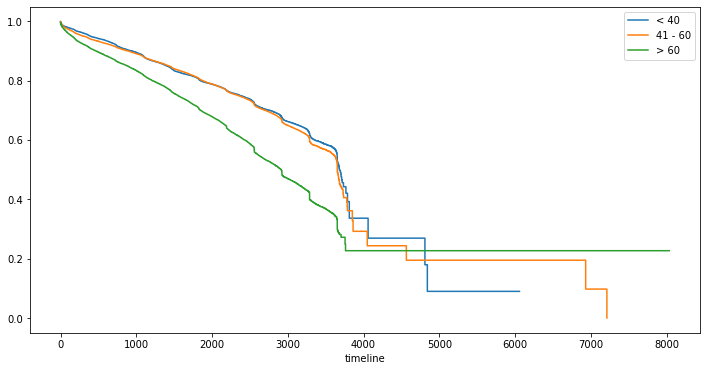

In [92]:
#KPM Curve by age group
ax = subplot(111)

for r in dataset_survival['REC_AGE_AT_TX'].unique(): 
    ix = dataset_survival['REC_AGE_AT_TX'] == r
    kmf.fit(T[ix], C[ix], label = r)
    ax=kmf.plot(ax=ax, ci_show=False)

Cases of KGA were distributed approximately as follows: less than 40=25%, between 41-60 = 40%, 
greater than 60=35%.
The survival curves of people less than 40 and between 41-60 are similar and higher than people of age greater than 60 years during the first 4000 days
Thus survival curves of people <40 and 41-60 have similar survival probabilities until they diverge after 5000 days

In summary people less than 60 years on average have a higher probability of survival compared to those more than 60 years

#### IMMUNOGENICITY

QUESTION
what criteria should be used for grouping? 
Should we use avg ems, avg hms, avg ams  and what should be the cut off points?
Currently using 1.8 and 3.0 as cut offs

##### Avg_EMS

In [93]:
dataset_survival['Avg_EMS'].unique()

array([ 4.64375, 18.835  , 11.52125, ...,  9.35875,  3.28625, 12.19125])

In [94]:
#fxn to create age group (Using cut of 1.8 for this)
def Avg_EMS_group(Avg_EMS):
    if Avg_EMS <= 1.8: 
        return "<= 1.8"
    else:
        return ">1.8"

In [95]:
dataset_survival['Avg_EMS_group'] = dataset_survival['Avg_EMS'].apply(Avg_EMS_group)

In [96]:
dataset_survival.Avg_EMS_group.value_counts()

>1.8      74406
<= 1.8     6598
Name: Avg_EMS_group, dtype: int64

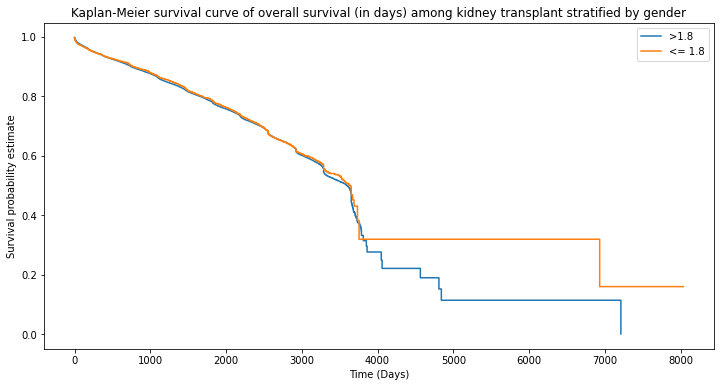

In [97]:
ax = subplot(111)

for r in dataset_survival['Avg_EMS_group'].unique(): 
    ix = dataset_survival['Avg_EMS_group'] == r
    kmf.fit(T[ix], C[ix], label = r)
    ax=kmf.plot(ax=ax, ci_show=False)
    plt.xlabel('Time (Days)')
    plt.ylabel('Survival probability estimate')
    plt.title('Kaplan-Meier survival curve of overall survival (in days) among kidney transplant stratified by gender')

In [98]:
# using 3.0 as cut off now
def Avg_EMS_group2(Avg_EMS):
    if Avg_EMS <= 1.8: 
        return "<= 3.0"
    else:#>=60
        return ">3.0"

In [99]:
dataset_survival['Avg_EMS_group2'] = dataset_survival['Avg_EMS'].apply(Avg_EMS_group2)

In [100]:
dataset_survival.Avg_EMS_group2.value_counts()

>3.0      74406
<= 3.0     6598
Name: Avg_EMS_group2, dtype: int64

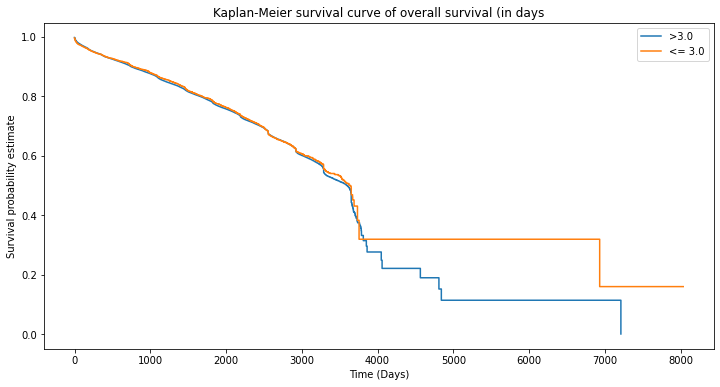

In [101]:
ax = subplot(111)

for r in dataset_survival['Avg_EMS_group2'].unique(): 
    ix = dataset_survival['Avg_EMS_group2'] == r
    kmf.fit(T[ix], C[ix], label = r)
    ax=kmf.plot(ax=ax, ci_show=False)
    plt.xlabel('Time (Days)')
    plt.ylabel('Survival probability estimate')
    plt.title('Kaplan-Meier survival curve of overall survival (in days')

##### Avg_HMS

In [102]:
#1.8 cut off
def Avg_HMS_group(Avg_HMS):
    if Avg_HMS <= 1.8: 
        return "<= 1.8"
    else:#>=60
        return ">1.8"

In [103]:
dataset_survival['Avg_HMS_group'] = dataset_survival['Avg_HMS'].apply(Avg_HMS_group)

In [104]:
dataset_survival.Avg_HMS_group.value_counts()

>1.8      74563
<= 1.8     6441
Name: Avg_HMS_group, dtype: int64

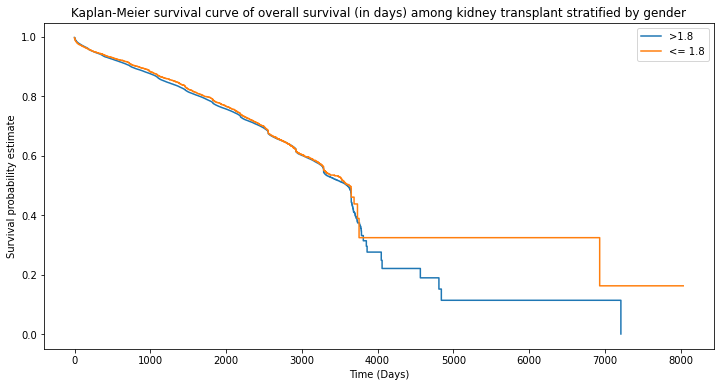

In [105]:
ax = subplot(111)

for r in dataset_survival['Avg_HMS_group'].unique(): #unique()[:4] or unique()[4:]we can reduce the groupings here if its too many of them
    ix = dataset_survival['Avg_HMS_group'] == r
    kmf.fit(T[ix], C[ix], label = r)
    ax=kmf.plot(ax=ax, ci_show=False)
    plt.xlabel('Time (Days)')
    plt.ylabel('Survival probability estimate')
    plt.title('Kaplan-Meier survival curve of overall survival (in days) among kidney transplant stratified by gender')

In [106]:
#3.0 cut off
def Avg_HMS_group2(Avg_HMS):
    if Avg_HMS <= 3.0: 
        return "<= 3.0"
    else:
        return ">3.0"

In [107]:
dataset_survival['Avg_HMS_group2'] = dataset_survival['Avg_HMS'].apply(Avg_HMS_group2)

In [108]:
dataset_survival.Avg_HMS_group2.value_counts()

>3.0      71412
<= 3.0     9592
Name: Avg_HMS_group2, dtype: int64

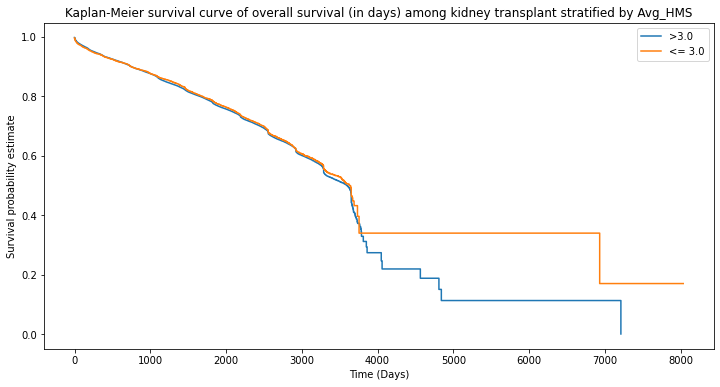

In [109]:
ax = subplot(111)

for r in dataset_survival['Avg_HMS_group2'].unique(): 
    ix = dataset_survival['Avg_HMS_group2'] == r
    kmf.fit(T[ix], C[ix], label = r)
    ax=kmf.plot(ax=ax, ci_show=False)
    plt.xlabel('Time (Days)')
    plt.ylabel('Survival probability estimate')
    plt.title('Kaplan-Meier survival curve of overall survival (in days) among kidney transplant stratified by Avg_HMS')

##### Avg_AMS

In [110]:
def Avg_AMS_group(Avg_AMS):
    if Avg_AMS <= 1.8: 
        return "<= 1.8"
    else:
        return ">1.8"

In [111]:
dataset_survival['Avg_AMS_GROUP'] = dataset_survival['Avg_AMS'].apply(Avg_AMS_group)

In [112]:
dataset_survival.Avg_AMS_GROUP.value_counts()

>1.8      73692
<= 1.8     7312
Name: Avg_AMS_GROUP, dtype: int64

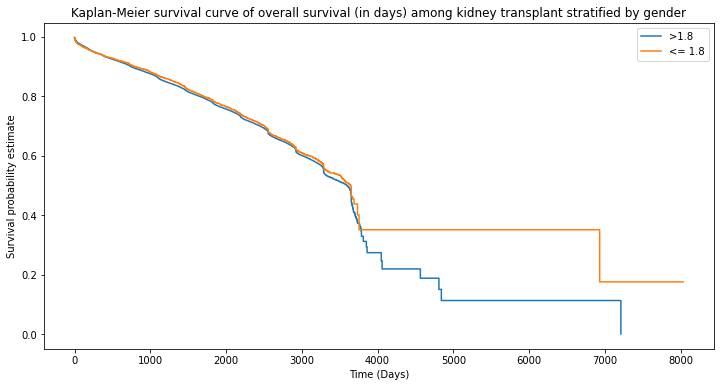

In [113]:
ax = subplot(111)

for r in dataset_survival['Avg_AMS_GROUP'].unique(): #unique()[:4] or unique()[4:]we can reduce the groupings here if its too many of them
    ix = dataset_survival['Avg_AMS_GROUP'] == r
    kmf.fit(T[ix], C[ix], label = r)
    ax=kmf.plot(ax=ax, ci_show=False)
    plt.xlabel('Time (Days)')
    plt.ylabel('Survival probability estimate')
    plt.title('Kaplan-Meier survival curve of overall survival (in days) among kidney transplant stratified by gender')

In [114]:
#3.0 cut off
def Avg_AMS_group2(Avg_AMS):
    if Avg_AMS <= 3.0: #
        return "<= 3.0"
    else:#>=60
        return ">3.0"

In [115]:
dataset_survival['Avg_AMS_GROUP2'] = dataset_survival['Avg_AMS'].apply(Avg_AMS_group2)

In [116]:
dataset_survival.Avg_AMS_GROUP2.value_counts()

>3.0      68112
<= 3.0    12892
Name: Avg_AMS_GROUP2, dtype: int64

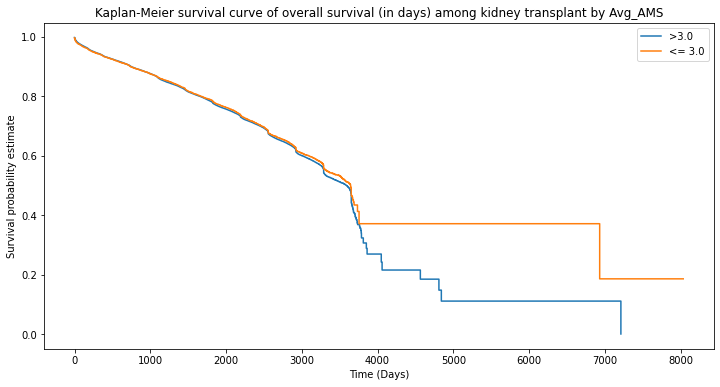

In [117]:
ax = subplot(111)

for r in dataset_survival['Avg_AMS_GROUP2'].unique():
    ix = dataset_survival['Avg_AMS_GROUP2'] == r
    kmf.fit(T[ix], C[ix], label = r)
    ax=kmf.plot(ax=ax, ci_show=False)
    plt.xlabel('Time (Days)')
    plt.ylabel('Survival probability estimate')
    plt.title('Kaplan-Meier survival curve of overall survival (in days) among kidney transplant by Avg_AMS')

The KPM curves for immunogenicity calculations show patients with higher immunogenicity values are more likely to have worse graft survival outcomes as the days pass by

#### EPLET LOAD

QUESTION
what criteria should be used for the cut off?
I used 10 for now

In [118]:
dataset_survival['AbvMismatch'].unique()

array([19, 21, 16, 17, 11, 15, 18,  0, 10,  4, 12, 14, 20,  8,  3, 13,  6,
        2,  9, 22, 23,  7, 24,  1,  5, 25, 26, 27, 28, 29, 30, 31, 32])

In [119]:
#10 used as cut off
def eplet_group(age):
    if age <= 10: 
        return "<= 10"
    else:
        return ">10"

In [120]:
dataset_survival['AbvMismatch2'] = dataset_survival['AbvMismatch'].apply(eplet_group)

In [121]:
dataset_survival.AbvMismatch2.value_counts()

>10      58418
<= 10    22586
Name: AbvMismatch2, dtype: int64

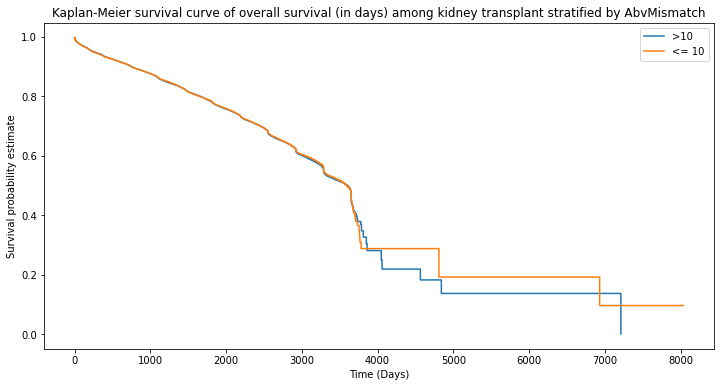

In [122]:
#KPM Curve by AbvMismatch group
ax = subplot(111)

for r in dataset_survival['AbvMismatch2'].unique():
    ix = dataset_survival['AbvMismatch2'] == r
    kmf.fit(T[ix], C[ix], label = r)
    ax=kmf.plot(ax=ax, ci_show=False)
    plt.xlabel('Time (Days)')
    plt.ylabel('Survival probability estimate')
    plt.title('Kaplan-Meier survival curve of overall survival (in days) among kidney transplant stratified by AbvMismatch')

The survival curves above shows that people with an eplet load less than 10 have a higher probability of kidney graft survival over the long run compared to those greater than 10 

The curves have similar survival probabilities in the early days until they diverge after 4000 days
Thus patients with higher eplet MM load are more likely to have worse graft survival outcomes over a longer period of time.

### COX REGRESSION

In [ ]:
from lifelines import CoxPHFitter 

In [ ]:
PRA,